In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from torchvision.datasets.mnist import MNIST
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import vae

using devide: cpu


Auto-Encoding Variational Bayes https://arxiv.org/abs/1312.6114
Tutorial on Variational Autoencoders https://arxiv.org/abs/1606.05908
https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf

In [2]:
mnist_dataset_train = MNIST('./tmp/', train=True, download=True,
                            transform=vae.preprocess)

In [3]:
train_data = DataLoader(mnist_dataset_train, batch_size=16, shuffle=True)

In [4]:
len(mnist_dataset_train)

60000

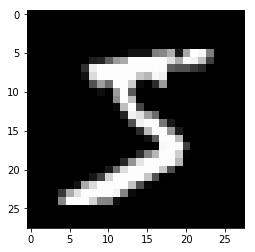

In [5]:
plt.imshow(mnist_dataset_train[0][0].numpy()[0], cmap='gray')

In [30]:
model = vae.train(20, beta=2)

epoch: 0 loss: 211.537109375
epoch: 1 loss: 169.6327362060547
epoch: 2 loss: 145.0383758544922
epoch: 3 loss: 133.0738525390625
epoch: 4 loss: 125.87761688232422
epoch: 5 loss: 121.28435516357422
epoch: 6 loss: 118.07845306396484
epoch: 7 loss: 115.93445587158203
epoch: 8 loss: 114.23157501220703
epoch: 9 loss: 112.95085906982422
epoch: 10 loss: 111.81078338623047
epoch: 11 loss: 110.59358978271484
epoch: 12 loss: 109.69287872314453
epoch: 13 loss: 108.90242767333984
epoch: 14 loss: 108.0432357788086
epoch: 15 loss: 107.29402160644531
epoch: 16 loss: 106.71751403808594
epoch: 17 loss: 106.1995620727539
epoch: 18 loss: 105.74737548828125
epoch: 19 loss: 105.30619049072266
epoch: 20 loss: 104.96974182128906
epoch: 21 loss: 104.6316909790039
epoch: 22 loss: 104.33336639404297
epoch: 23 loss: 104.00995635986328
epoch: 24 loss: 103.7538070678711
epoch: 25 loss: 103.47721099853516
epoch: 26 loss: 103.3034439086914
epoch: 27 loss: 103.04255676269531
epoch: 28 loss: 102.77839660644531
epoch: 2

In [6]:
#torch.save(model, 'beta_vae_math.pth')
model = torch.load('beta_vae_math.pth') 

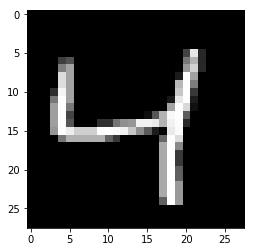

In [7]:
plt.imshow(mnist_dataset_train[2][0].numpy()[0], cmap='gray')

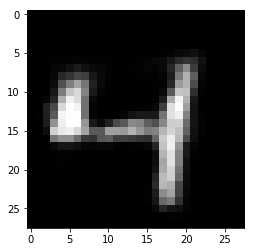

In [8]:
img, _, _ = model(Variable(mnist_dataset_train[2][0]))
img = img.data
plt.imshow(vae.to_img(img)[0], cmap='gray')

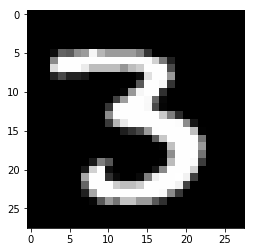

In [18]:
plt.imshow(mnist_dataset_train[12][0].numpy()[0], cmap='gray')

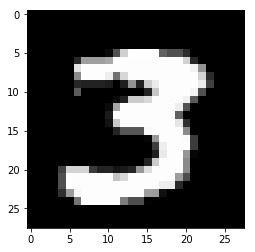

In [19]:
plt.imshow(mnist_dataset_train[27][0].numpy()[0], cmap='gray')

In [20]:
inp0 = Variable(mnist_dataset_train[12][0])
out0 = model.encode(inp0)[0]

inp1 = Variable(mnist_dataset_train[27][0])
out1 = model.encode(inp1)[0]

difference = out0 - out1

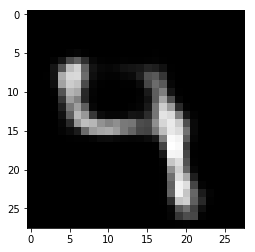

In [21]:
inp2 = Variable(mnist_dataset_train[2][0])
out2 = model.encode(inp2)[0]

plt.imshow(model.decode(out2 + 1*difference).data.numpy()[0], cmap='gray')

In [22]:
@interact(x=(-1.0,1.0,0.1))
def h(x=0):
    plt.imshow(model.decode(out2 + x*difference).data.numpy()[0], cmap='gray')

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

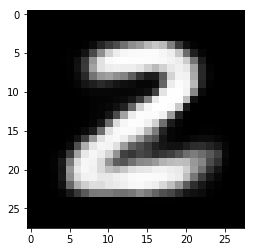

In [23]:
inp2 = Variable(mnist_dataset_train[25][0])
out2 = model.encode(inp2)[0]

plt.imshow(model.decode(out2).data.numpy()[0], cmap='gray')

In [24]:
@interact(x=(-1.0,1.0,0.1))
def h(x=0):
    plt.imshow(model.decode(out2 + x*difference).data.numpy()[0], cmap='gray')

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

In [25]:
difference.data.numpy()

array([[ 0.00947595, -0.88787687,  0.05737518,  0.14616886, -0.00805945,
         0.07454944, -0.02565768, -1.001086  ,  0.02082661, -0.12440822,
         0.04678337, -0.09980559,  1.058255  ,  0.02736973, -0.06684554,
        -0.00542119,  0.01263651, -1.0897198 , -0.00327609,  0.03139812]],
      dtype=float32)

In [26]:
np.abs(difference.data.numpy()).mean()

0.23984973